# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_parquet('../data/clean_house.parquet')

### Create feature engineered adj_sqft by dividing sqft_living by yr_since_renovate

In [3]:
house['adj_sqft_living'] = house.sqft_living / house.yr_since_renovate

### Create feature engineered total_rooms by multiplying bathrooms and bedrooms 

In [4]:
house['total_rooms'] = house.bathrooms * house.bedrooms

### Get Top Correlated Features with Price

In [5]:
#Get correlation table of all numeric values of the housing data
corr_mat = house.corr(method='pearson')

#Get top right part of correlation table
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

#Drop the non top right part and unstack the data
unique_corr = upper_corr_mat.unstack().dropna()

#Sort the values and get absolute values to account for negative correlation
sort_corr = unique_corr.abs().sort_values(ascending=False)

#Convert to data frame
new_corr = sort_corr.to_frame().reset_index()

#Make correlation data frame with just correlations that contain price
price_corr = new_corr[(new_corr.level_0 == 'price') | (new_corr.level_1 == 'price')]

#Rename columns
price_corr.columns = ['feature1','feature2','corr']

In [6]:
price_corr

,feature1,feature2,corr
14,sqft_living,price,0.701929
17,grade_value,price,0.667964
19,sqft_above,price,0.605392
22,sqft_living15,price,0.585267
28,bathrooms,price,0.525915
30,total_rooms,price,0.518426
45,view,price,0.396419
55,has_view,price,0.358193
66,sqft_basement,price,0.323794
69,bedrooms,price,0.315961


In [7]:
# Get top ten correlations
top_10 = price_corr[0:10]

# Make DataFrame of price and its top ten correlations
top_10 = house[['price']+list(top_10.feature1)]

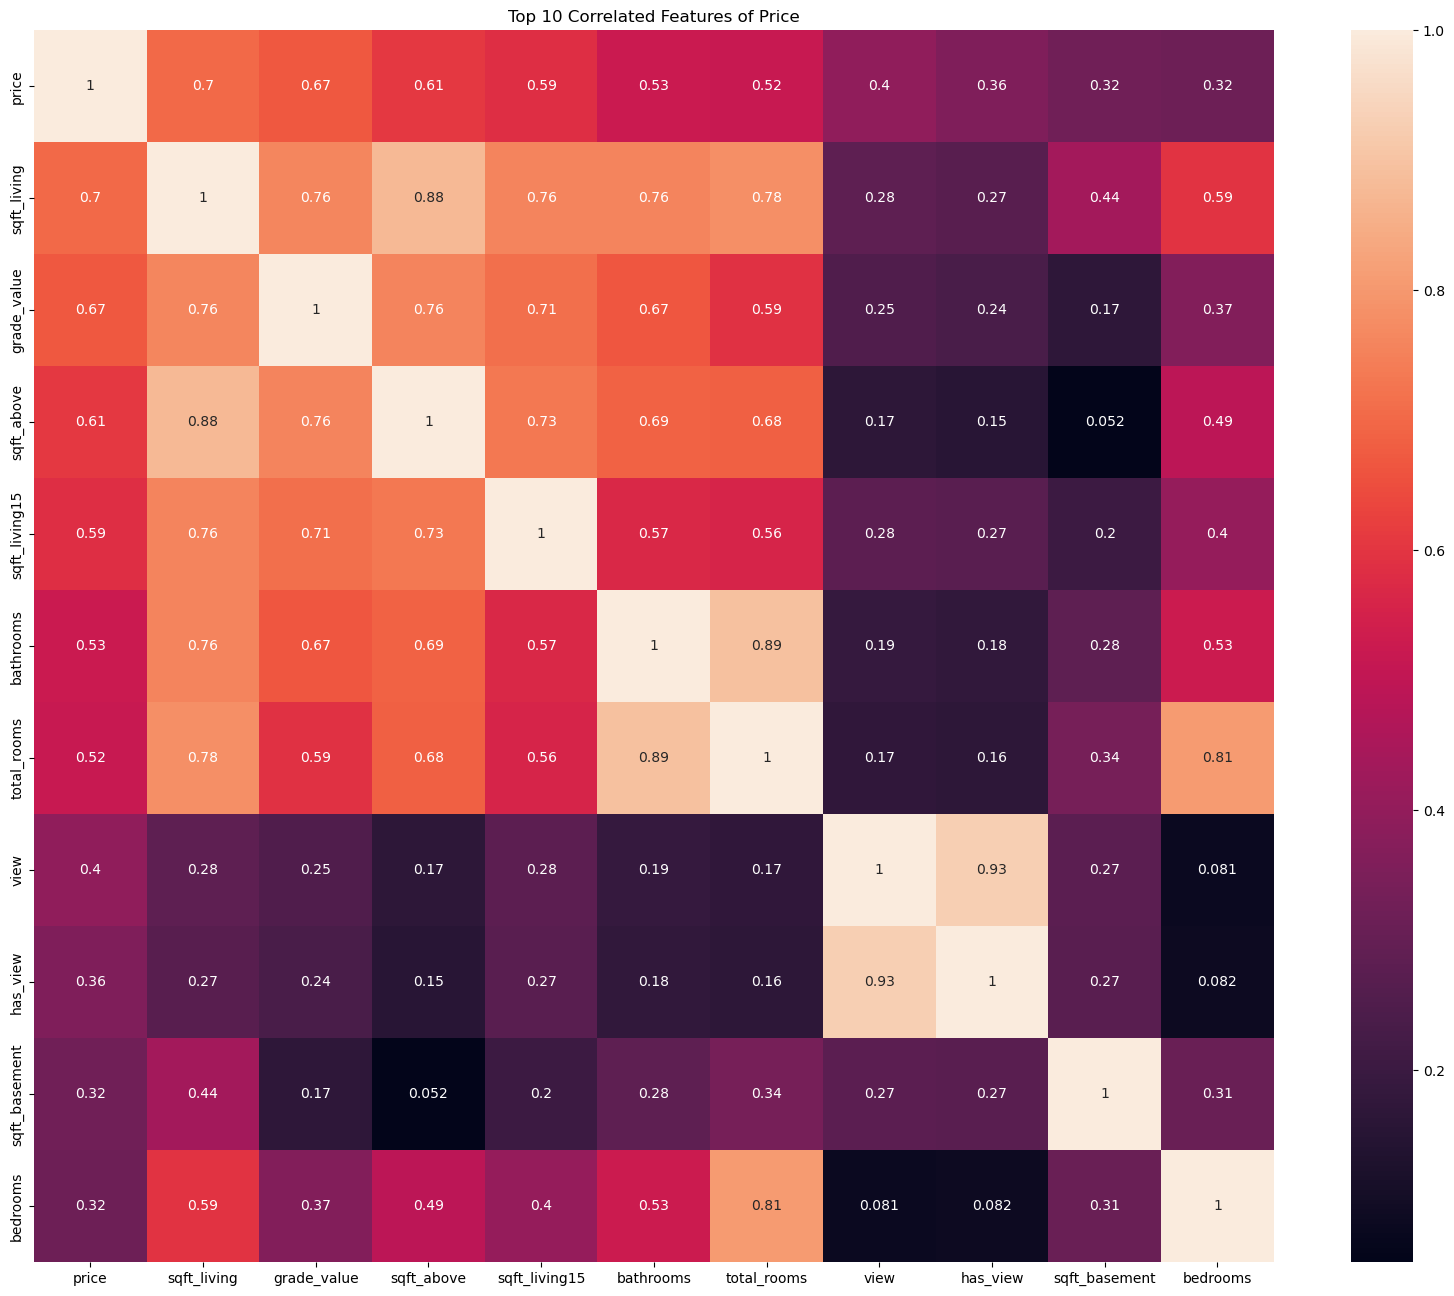

In [8]:
# Heatmap of price and its top 10 correlated features
plt.figure(figsize=(20,16))
plt.title("Top 10 Correlated Features of Price")
sns.heatmap(top_10.corr().abs(),annot=True);

Sqft_living, grade_value, sqft_living15, bathrooms, and view are the most correlated with price if you remove sqft_above and total rooms as they are partially accounted for in these features.

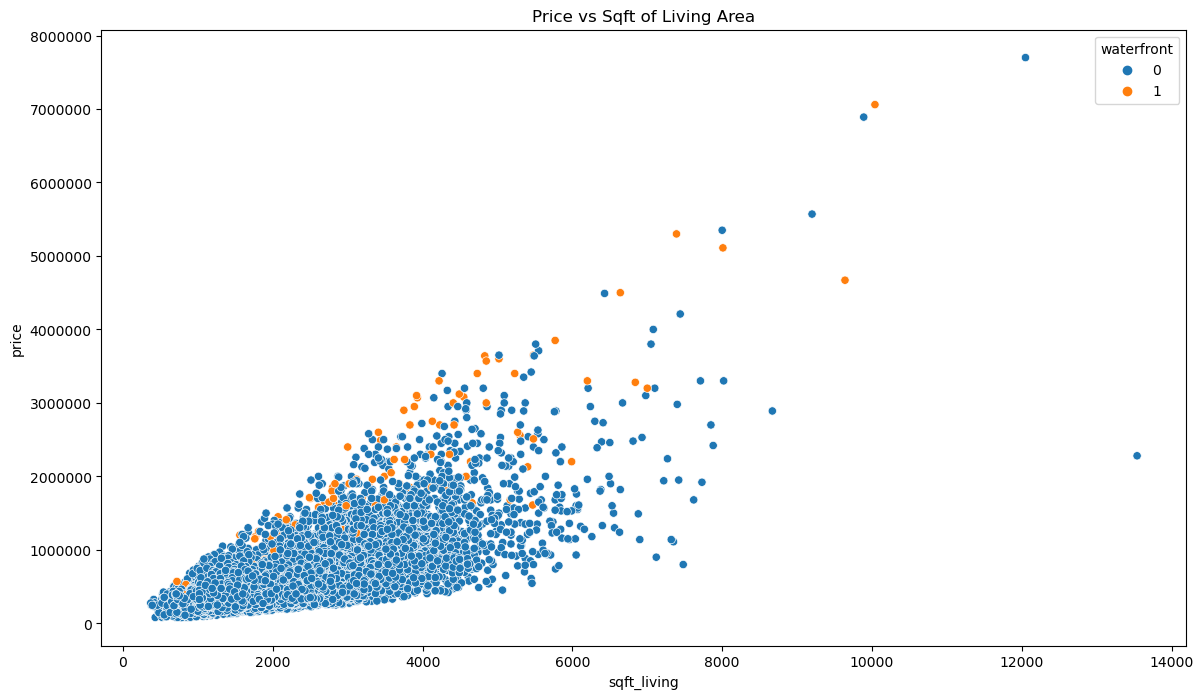

In [9]:
# Plot price with sqft_living as well as waterfront
plt.figure(figsize=(14,8))
sns.scatterplot(x=house.sqft_living,y=house.price,hue=house.waterfront)
plt.title("Price vs Sqft of Living Area")
plt.ticklabel_format(style='plain',axis='y');

There is a fairly linear relationship between price and sqft_living. Additionally waterfront homes have higher prices for comparable sqft_living

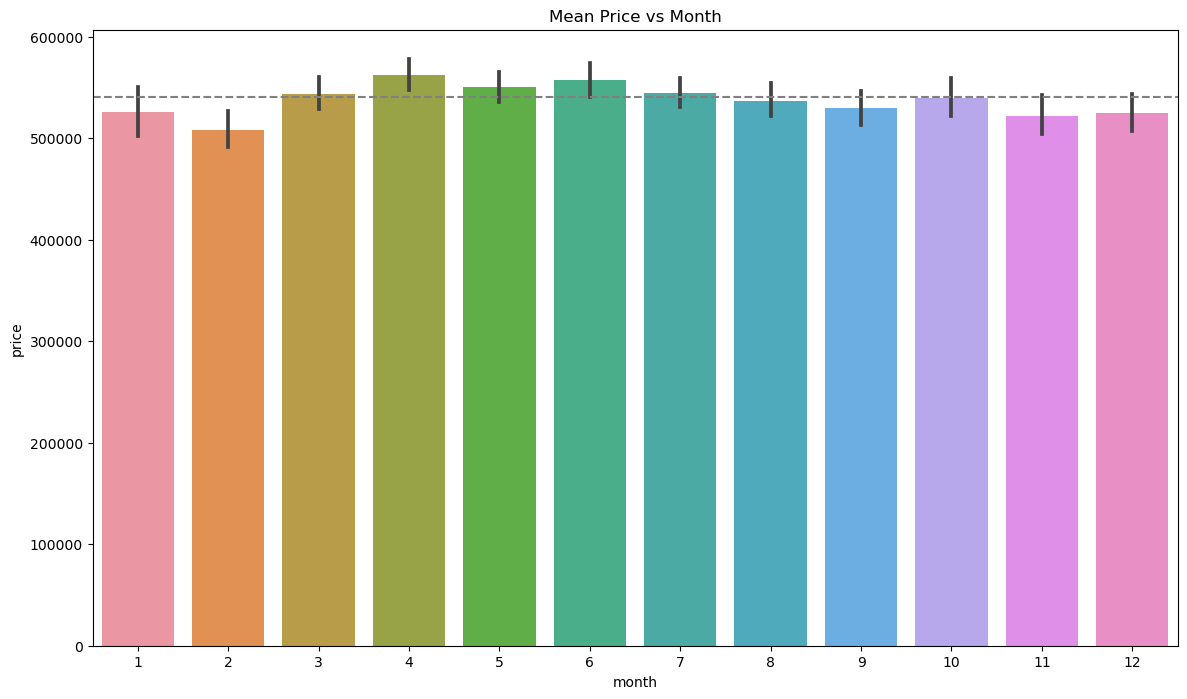

In [10]:
# Plot mean price by month
plt.figure(figsize=(14,8))
sns.barplot(x=house.month,y=house.price)
plt.axhline(house.price.mean(),linestyle ='--',color='gray')
plt.title('Mean Price vs Month');

Not a major difference in mean price per month but the summer months net a slightly higher mean than the winter months

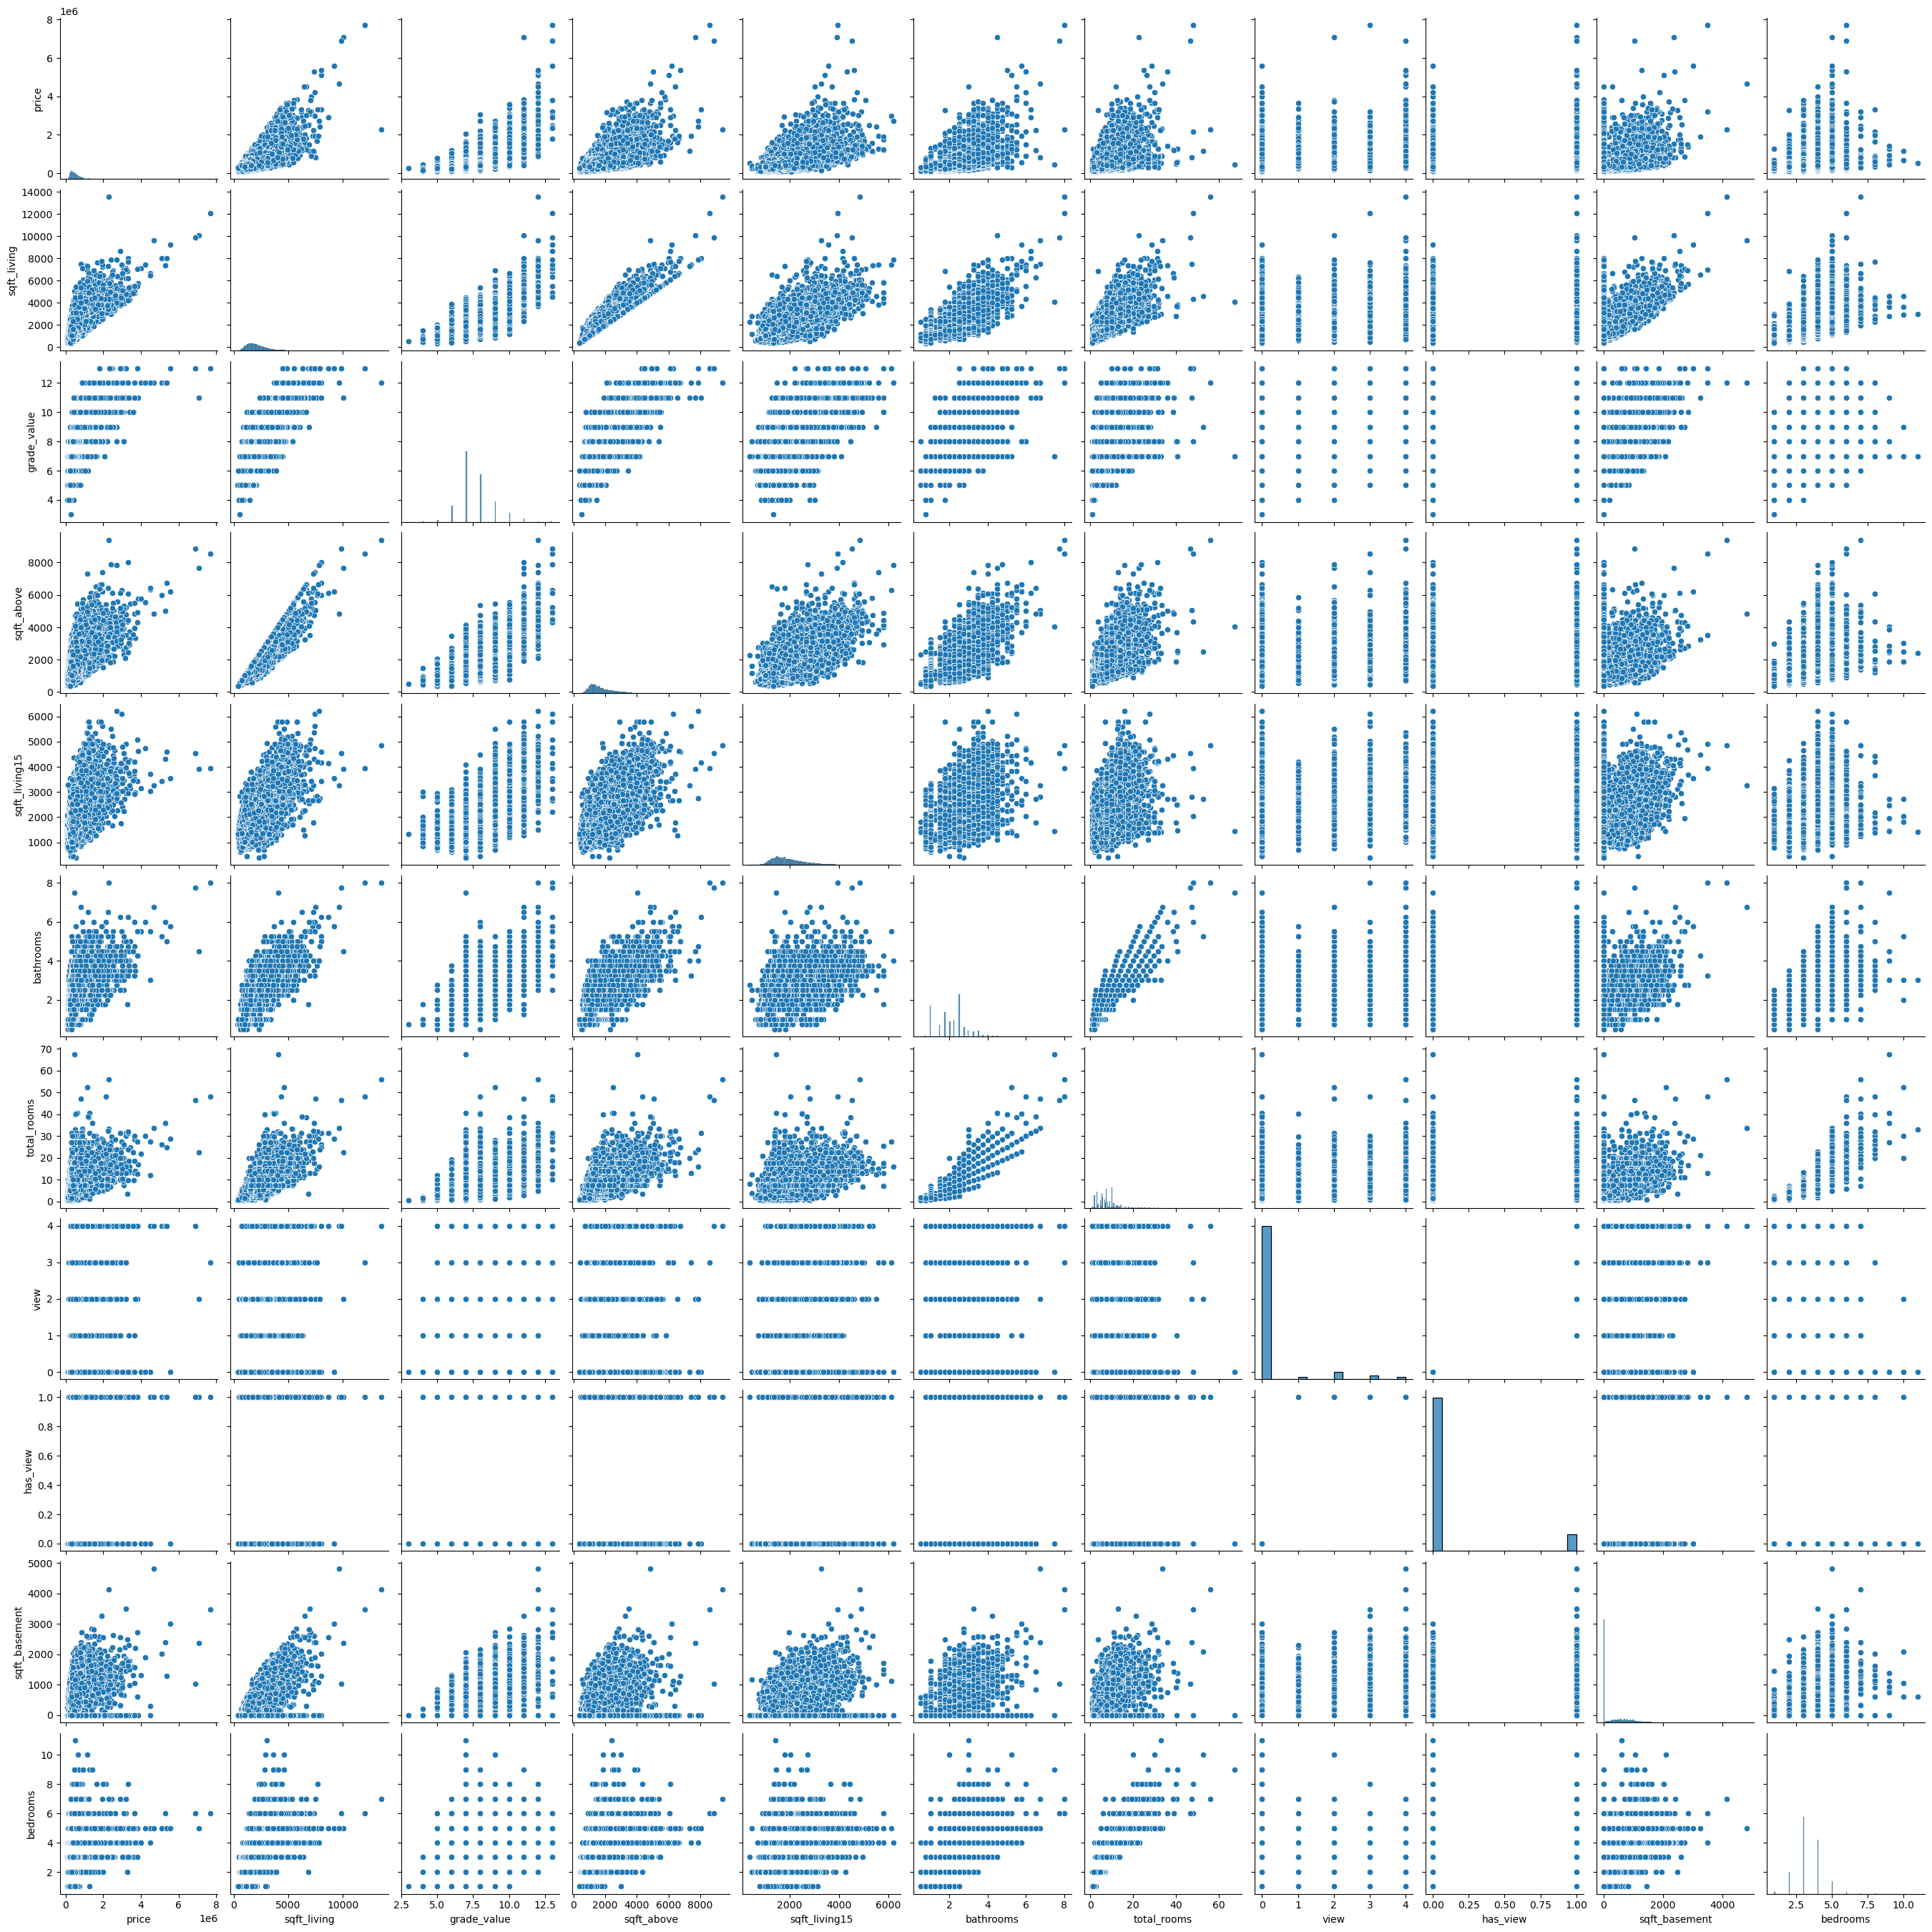

In [11]:
# Pairplot of the top 10 features and price
sns.pairplot(top_10);

Most of the relationships between the continuous variables are positive linear relationships

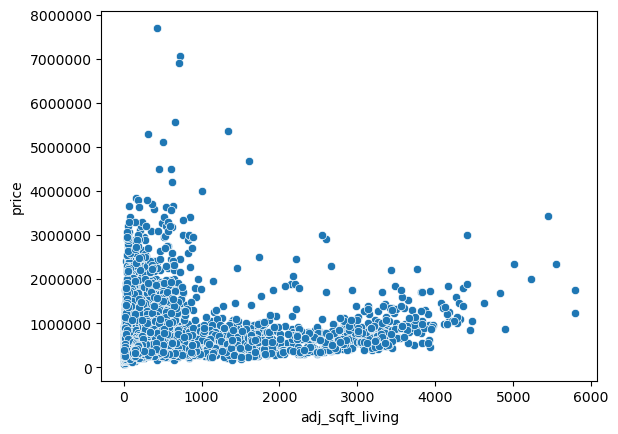

In [12]:
# Scatterplot of adj_sqft_living and price
sns.scatterplot(x=house.adj_sqft_living,y=house.price)
plt.ticklabel_format(axis='y',style='plain');

Does not appear to be a linear relationship and decided not to pursue this metric any further

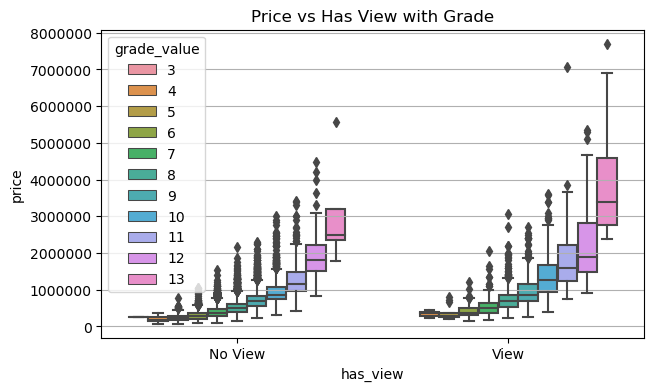

In [37]:
# View by price with grade_value
fig, ax = plt.subplots(figsize=(7,4))
sns.boxplot(x=house.has_view,y=house.price,hue=house.grade_value)
plt.ticklabel_format(axis='y',style='plain')
ax.set_xticklabels(['No View', 'View'])
ax.yaxis.grid(True)
plt.
plt.title('Price vs Has View with Grade');

There is a much wider distributions of price for houses with a view than without a view. Q3 is particularly higher in view than no view. Very strong positive exponential relationship between price and grade_value. This shows the reason grade_value is one of the top features.

In [14]:
house.groupby('zipcode').mean().sort_values('view')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,month,grade_value,has_view,renovated,yr_since_renovate,total_rooms,adj_sqft_living
zipcode,,,,,,,,,,,,,,,,,,,,,
98148,5.579459e+09,2.849086e+05,3.140351,1.793860,1610.526316,8960.719298,1.210526,0.000000,0.000000,3.070175,...,-122.329316,1611.228070,8812.385965,6.578947,6.947368,0.000000,0.017544,50.964912,5.907895,172.981056
98031,4.475569e+09,3.003404e+05,3.498168,2.155678,1929.692308,12106.772894,1.443223,0.000000,0.007326,3.501832,...,-122.189304,1908.853480,8482.197802,6.487179,7.377289,0.003663,0.003663,32.996337,7.706960,96.804311
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,...,-122.213357,1479.030151,7585.482412,6.698492,6.693467,0.005025,0.025126,46.075377,6.525126,166.788080
98077,3.153599e+09,6.828860e+05,3.616162,2.465909,2857.045455,54829.000000,1.641414,0.000000,0.010101,3.348485,...,-122.061202,2782.525253,45491.767677,6.651515,8.782828,0.005051,0.015152,29.752525,9.185606,129.802158
98168,3.204785e+09,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,0.014870,3.245353,...,-122.307877,1471.680297,9744.022305,6.550186,6.509294,0.007435,0.022305,61.159851,4.606877,79.242361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98022,4.014550e+09,3.167424e+05,3.158798,1.918455,1837.313305,74233.914163,1.324034,0.000000,0.630901,3.733906,...,-121.995549,1801.545064,51488.420601,6.832618,7.175966,0.253219,0.055794,39.879828,6.307940,123.826206
98166,4.043990e+09,4.643224e+05,3.377953,1.911417,2067.905512,13609.397638,1.250000,0.055118,0.665354,3.574803,...,-122.350303,1886.850394,12694.322835,6.291339,7.393701,0.271654,0.086614,53.267717,6.738189,123.524543
98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.039007,0.780142,3.787234,...,-122.225592,2898.744681,12801.283688,6.453901,8.960993,0.336879,0.102837,39.560284,11.362589,NaN
